In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('winequality.csv')

In [3]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe

<bound method NDFrame.describe of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  tot

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [8]:
df['type'] = df['type'].replace(['white','red'], [0,1])

In [9]:
df['fixed acidity'].fillna((df['fixed acidity'].mean()),inplace=True)
df['volatile acidity'].fillna((df['volatile acidity'].mean()),inplace=True)
df['citric acid'].fillna((df['citric acid'].mean()),inplace=True)
df['residual sugar'].fillna((df['residual sugar'].mean()),inplace=True)
df['chlorides'].fillna((df['chlorides'].mean()),inplace=True)
df['pH'].fillna((df['pH'].mean()),inplace=True)
df['sulphates'].fillna((df['sulphates'].mean()),inplace=True)

In [10]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

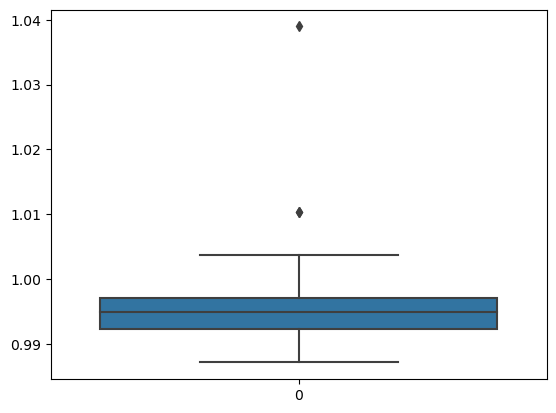

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.boxplot(df['density'])
plt.show()

In [12]:
print(df['density'])
q1 = df['density'].quantile(0.25)
q3 = df['density'].quantile(0.75)

0       1.00100
1       0.99400
2       0.99510
3       0.99560
4       0.99560
         ...   
6492    0.99490
6493    0.99512
6494    0.99574
6495    0.99547
6496    0.99549
Name: density, Length: 6497, dtype: float64


In [13]:
iqr = q3 - q1
print(iqr)

0.004650000000000043


In [14]:
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [15]:
print(upper)
print(lower)

1.003965
0.9853649999999999


In [16]:
import numpy as np
out1 = np.where(df['density']>=upper)[0]
out2 = np.where(df['density']<=lower)[0]

In [17]:
df.drop(index=out1,inplace=True)
df.drop(index=out2,inplace=True)

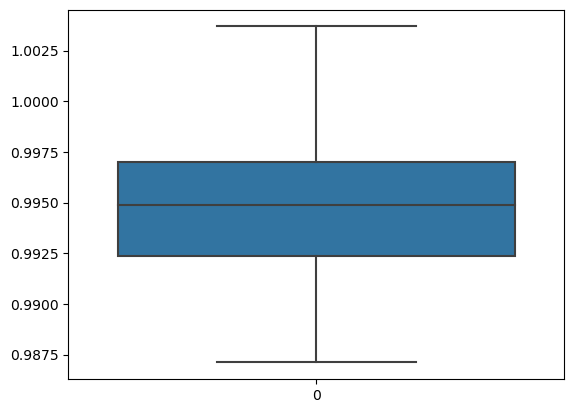

In [18]:
sns.boxplot(df['density'])
plt.show()

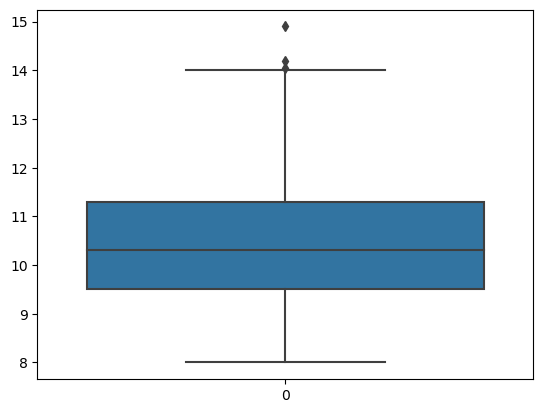

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.boxplot(df['alcohol'])
plt.show()

In [20]:
print(df['alcohol'])
q1 = df['alcohol'].quantile(0.25)
q3 = df['alcohol'].quantile(0.75)

0        8.8
1        9.5
2       10.1
3        9.9
4        9.9
        ... 
6492    10.5
6493    11.2
6494    11.0
6495    10.2
6496    11.0
Name: alcohol, Length: 6494, dtype: float64


In [21]:
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
print(iqr)
print(upper)
print(lower)

1.8000000000000007
14.000000000000002
6.799999999999999


In [22]:
out1 = np.where(df['alcohol']>=upper)[0]
out2 = np.where(df['alcohol']<=lower)[0]

In [23]:
df.drop(index=out1,inplace=True)
df.drop(index=out2,inplace=True)

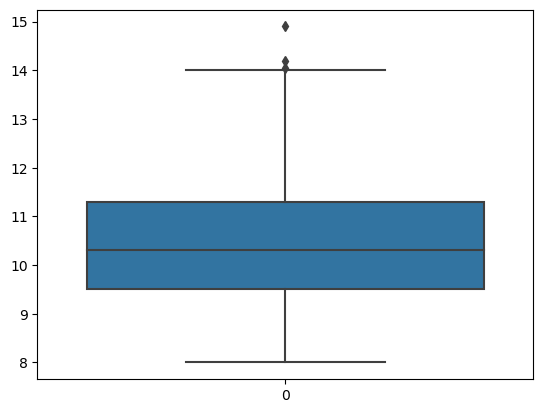

In [24]:
sns.boxplot(df['alcohol'])
plt.show()

In [25]:
df['quality'].value_counts()

6    2831
5    2138
7    1078
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6491 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6491 non-null   int64  
 1   fixed acidity         6491 non-null   float64
 2   volatile acidity      6491 non-null   float64
 3   citric acid           6491 non-null   float64
 4   residual sugar        6491 non-null   float64
 5   chlorides             6491 non-null   float64
 6   free sulfur dioxide   6491 non-null   float64
 7   total sulfur dioxide  6491 non-null   float64
 8   density               6491 non-null   float64
 9   pH                    6491 non-null   float64
 10  sulphates             6491 non-null   float64
 11  alcohol               6491 non-null   float64
 12  quality               6491 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 968.0 KB


In [41]:
X=df.iloc[:,:12]
y=df.iloc[:,12]

In [42]:
print(X)
print(y)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            7.0             0.270         0.36            20.7   
1        0            6.3             0.300         0.34             1.6   
2        0            8.1             0.280         0.40             6.9   
3        0            7.2             0.230         0.32             8.5   
4        0            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492     1            6.2             0.600         0.08             2.0   
6493     1            5.9             0.550         0.10             2.2   
6494     1            6.3             0.510         0.13             2.3   
6495     1            5.9             0.645         0.12             2.0   
6496     1            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

In [43]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
print('Before:')
print(y.value_counts())
x_over,Y_over=ros.fit_resample(X,y)
print('After:')
print(Y_over.value_counts())
y = Y_over
y.value_counts()
X= x_over
X.value_counts()

Before:
6    2831
5    2138
7    1078
4     216
8     193
3      30
9       5
Name: quality, dtype: int64
After:
6    2831
5    2831
7    2831
8    2831
4    2831
3    2831
9    2831
Name: quality, dtype: int64


type  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol
0     7.4            0.24              0.36         2.0             0.031      27.0                 139.0                 0.99055  3.28  0.48       12.5       582
      9.1            0.27              0.45         10.6            0.035      28.0                 124.0                 0.99700  3.20  0.46       10.4       578
      6.6            0.36              0.29         1.6             0.021      24.0                 85.0                  0.98965  3.41  0.61       12.4       575
      7.1            0.26              0.49         2.2             0.032      31.0                 113.0                 0.99030  3.37  0.42       12.9       551
      6.9            0.36              0.34         4.2             0.018      57.0                 119.0                 0.98980  3.28  0.36       12.7       545
                             

In [44]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=1)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.3274470232088799


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = rf.predict(x_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9224688866464851
